10000
40
168
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1 112
 254 252 171 141  67  14   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  85 252 241  47   0   0   0   0   0   0 241 252
 252 252 250  75   0   0   0  74 254 198  10   0   0   0   0   0  46 126
 212 254 254 223   8   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]


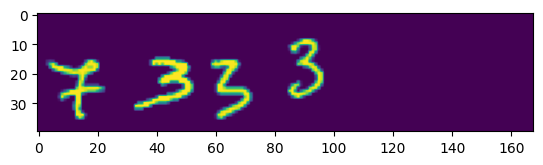

In [2]:
import numpy as np
import matplotlib.pyplot as plt


train_data1 = np.load('data0.npy')
train_lab1 = np.load('lab0.npy')
train_data2 = np.load('data1.npy')
train_lab2 = np.load('lab1.npy')
train_data3 = np.load('data2.npy')
train_lab3 = np.load('lab2.npy')

i = 1000
plt.imshow(train_data1[i])
plt.savefig('img.png')
print(len(train_data1))
print(len(train_data1[0]))
print(len(train_data1[0][0]))
print((train_data1[20][16]))

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

train_data1 = np.load('data0.npy')
train_lab1 = np.load('lab0.npy')
train_data2 = np.load('data1.npy')
train_lab2 = np.load('lab1.npy')
train_data3 = np.load('data2.npy')
train_lab3 = np.load('lab2.npy')

#Combine Data
train_data = np.concatenate([train_data1, train_data2, train_data3], axis=0)
train_labels = np.concatenate([train_lab1, train_lab2, train_lab3], axis=0)

#Normalize
train_data = train_data.astype(np.float32) / 255.0
train_labels = train_labels.astype(np.float32)

train_data = torch.tensor(train_data).unsqueeze(1)  
train_labels = torch.tensor(train_labels)

# 80-20 Split into Train and Val
dataset = TensorDataset(train_data, train_labels)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Model definition
class DigitSumCNN(nn.Module):
    def __init__(self):
        super(DigitSumCNN, self).__init__()
        self.conv_layers = nn.Sequential( #Conv layers
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc_layers = nn.Sequential( #Fully Connected Layers
            nn.Flatten(),
            nn.Linear(64 * 10 * 42, 128),  #batch*height*width
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x): #Forward Pass
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = DigitSumCNN().to(device)
criterion = nn.MSELoss() #Loss criterion
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 100
for epoch in range(epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

    train_loss = running_train_loss / len(train_loader)

    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)

            running_val_loss += loss.item()

    val_loss = running_val_loss / len(val_loader)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

torch.save(model.state_dict(), "digit_sum_cnn.pth")
print("Training over")


cuda
Epoch 1/100, Train Loss: 34.8392, Val Loss: 26.7296
Epoch 2/100, Train Loss: 22.6206, Val Loss: 19.5874
Epoch 3/100, Train Loss: 16.7374, Val Loss: 14.8866
Epoch 4/100, Train Loss: 13.3265, Val Loss: 12.7722
Epoch 5/100, Train Loss: 11.3005, Val Loss: 11.3400
Epoch 6/100, Train Loss: 9.8983, Val Loss: 11.2347
Epoch 7/100, Train Loss: 8.8666, Val Loss: 11.3615
Epoch 8/100, Train Loss: 7.8612, Val Loss: 11.1463
Epoch 9/100, Train Loss: 7.0227, Val Loss: 9.9271
Epoch 10/100, Train Loss: 6.3609, Val Loss: 10.1163
Epoch 11/100, Train Loss: 5.3833, Val Loss: 10.5969
Epoch 12/100, Train Loss: 4.9520, Val Loss: 10.3303
Epoch 13/100, Train Loss: 4.2408, Val Loss: 11.0493
Epoch 14/100, Train Loss: 3.6661, Val Loss: 10.6388
Epoch 15/100, Train Loss: 3.2192, Val Loss: 11.1310
Epoch 16/100, Train Loss: 2.6892, Val Loss: 11.0366
Epoch 17/100, Train Loss: 2.3554, Val Loss: 11.2845
Epoch 18/100, Train Loss: 2.0741, Val Loss: 11.5279
Epoch 19/100, Train Loss: 1.7546, Val Loss: 11.8211
Epoch 20/100

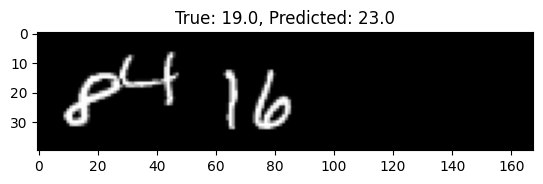

Validation Accuracy: 11.67%


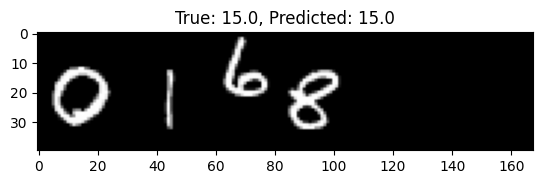

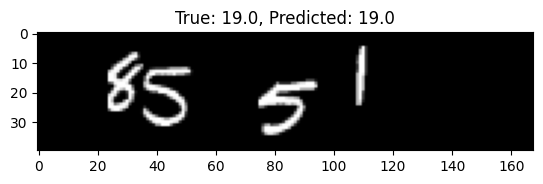

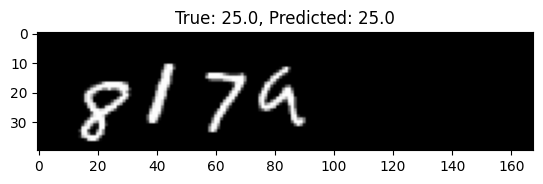

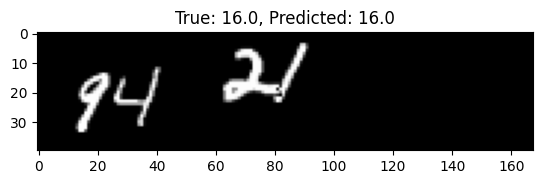

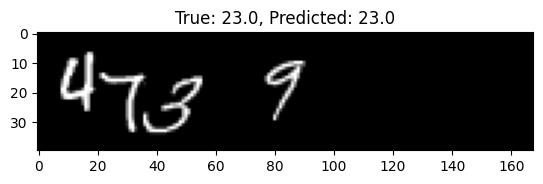

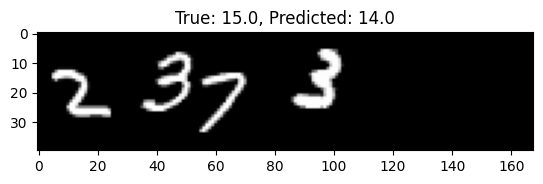

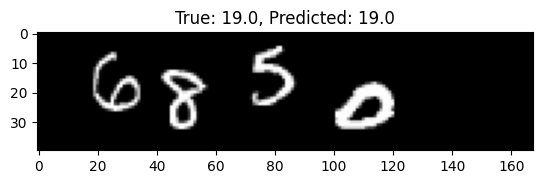

Training Accuracy: 80.44%


In [5]:
# Val and Train Accuracy Along with some GroundTruths
correct = 0
total = 0
i=0
with torch.no_grad():
    for inputs2, labels2 in val_loader:
        i+=1
        inputs, labels = inputs2.to(device), labels2.to(device)
        outputs = model(inputs).squeeze()
        predicted = torch.round(outputs)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        if i % 50 == 0: 
            img = inputs[0].cpu().squeeze().numpy()  
            plt.imshow(img, cmap='gray')
            plt.title(f"True: {labels[0].item()}, Predicted: {predicted[0].item()}")
            plt.show()
            
accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy:.2f}%")

correct = 0
total = 0
i=0

with torch.no_grad():
    for inputs2, labels2 in train_loader:
        i+=1
        inputs, labels = inputs2.to(device), labels2.to(device)
        outputs = model(inputs).squeeze()
        predicted = torch.round(outputs)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        if i % 50 == 0: 
            img = inputs[0].cpu().squeeze().numpy()  
            plt.imshow(img, cmap='gray')
            plt.title(f"True: {labels[0].item()}, Predicted: {predicted[0].item()}")
            plt.show()
            
accuracy = 100 * correct / total
print(f"Training Accuracy: {accuracy:.2f}%")
